# IGTI - Bootcamp - Cientista de Dados

## Desafio 1

Autor: Leonardo Simões

### Perguntas

1 - Ao criar um gráfico de colunas com a média de salário (ConvertedComp) por formação (EdLevel), filtrando os dados da França, como fica o gráfico? 

2 -  Ao criar um gráfico de colunas com a média de salário (ConvertedComp) por nível de satisfação (JobSat), filtrando os dados do Chile, como fica o gráfico?

3 - Crie um gráfico para analisar o uso dos Sistemas Operacionais (OpSys). Qual a Sistema Operacional mais usado na França?

4 - Crie um gráfico de dispersão com a idade (Age) e a média de salário por idade (ConvertedComp). Filtre por Albânia e adicione uma linha de tendência. Analisando a linha de tendência, podemos afirmar que à medida que a idade aumenta, o que acontece com o salário? 

5 - Crie um cartão para visualizar a média e outro para visualizar a mediana do salário (ConvertedComp) no Brasil. Qual o valor da média e mediana, respectivamente?

6 - Crie um gráfico para analisar o nível de formação dos desenvolvedores (EdLevel). Aplicando um filtro que remove apenas os registros dos Estados Unidos, qual é o país com maior número de desenvolvedores que nunca tiveram uma educação formal? 

7 - Crie um gráfico de forma que consiga visualizar quando os desenvolvedores começaram a trabalhar na área (Age1stCode). Com que idade a maioria das pessoas começa a programar no Brasil?

8 - Crie uma consulta em SQL e responda: Qual a média salarial nessa empresa? 

9 - Crie uma consulta em SQL e responda: Quantos empregados do departamento 5 trabalham mais de 10h por semana no projeto chamado "ProductX"? 

10 - Crie uma consulta em SQL e responda: Quantos empregados possuem um dependente com o mesmo primeiro nome que o deles? 

11 - Crie uma consulta em SQL e responda: Quais os nomes de todos os empregados que são diretamente supervisionados por Franklin Wong 

12 - Crie uma consulta em SQL e responda: Quem é a pessoa que possui mais tempo de alocação no projeto 'Newbenefits'? 

13 - Crie uma consulta em SQL e responda: Qual é a soma dos salários de todos os empregados do departamento chamado 'Research'? 

14 - Crie uma consulta em SQL e responda: Qual seria o custo do projeto com folha salarial (soma de todos os salários) caso a empresa desse 10% de aumento para todos os empregados que trabalham no projeto 'ProductX'? 

15 - Crie uma consulta em SQL e responda: Qual o nome do departamento com a menor média de salário entre seus funcionários? 

### Desenvolvimento

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df = df[['Age', 'Age1stCode', 'ConvertedComp', 'Country', 'EdLevel', 'JobSat', 'OpSys', 'YearsCode']]
df.head()

,Age,Age1stCode,ConvertedComp,Country,EdLevel,JobSat,OpSys,YearsCode
0,NaN,13,NaN,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Slightly satisfied,Windows,36
1,NaN,19,NaN,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Very dissatisfied,MacOS,7
2,NaN,15,NaN,Russian Federation,NaN,NaN,Linux-based,4
3,25.0,18,NaN,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Slightly dissatisfied,Linux-based,7
4,31.0,16,NaN,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Windows,15


In [44]:
df['Country'].value_counts()

United States                         12469
India                                  8403
United Kingdom                         3896
Germany                                3890
Canada                                 2191
                                      ...  
Marshall Islands                          1
Mali                                      1
Lesotho                                   1
Fiji                                      1
Micronesia, Federated States of...        1
Name: Country, Length: 183, dtype: int64

    1) Ao criar um gráfico de colunas com a média de salário (ConvertedComp) por formação (EdLevel), filtrando os dados da França, como fica o gráfico?

In [36]:
#Filtrando por França
df_franca = df.query('Country == "France"')
df_franca.head()

,Age,Age1stCode,ConvertedComp,Country,EdLevel,JobSat,OpSys,YearsCode
14,NaN,13,NaN,France,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Linux-based,4
36,19.0,16,NaN,France,"Associate degree (A.A., A.S., etc.)",Very satisfied,Windows,2
44,22.0,13,36753.0,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Very satisfied,Windows,9
45,24.0,14,37834.0,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Slightly satisfied,Windows,6
68,25.0,12,594539.0,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Very satisfied,MacOS,13


In [37]:
#Agrupar por formação e valor médio
salarios = df_franca.groupby('EdLevel').mean()['ConvertedComp']
salarios

EdLevel
Associate degree (A.A., A.S., etc.)                                                    70399.928571
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                           68572.212644
I never completed any formal education                                                 33727.666667
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        75916.759184
Other doctoral degree (Ph.D., Ed.D., etc.)                                             76021.690141
Primary/elementary school                                                              37834.000000
Professional degree (JD, MD, etc.)                                                     64255.657143
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    135849.142857
Some college/university study without earning a degree                                 74226.903846
Name: ConvertedComp, dtype: float64

In [38]:
type(salarios)

pandas.core.series.Series

In [39]:
salarios = salarios.sort_values(ascending=False)
salarios

EdLevel
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    135849.142857
Other doctoral degree (Ph.D., Ed.D., etc.)                                             76021.690141
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        75916.759184
Some college/university study without earning a degree                                 74226.903846
Associate degree (A.A., A.S., etc.)                                                    70399.928571
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                           68572.212644
Professional degree (JD, MD, etc.)                                                     64255.657143
Primary/elementary school                                                              37834.000000
I never completed any formal education                                                 33727.666667
Name: ConvertedComp, dtype: float64

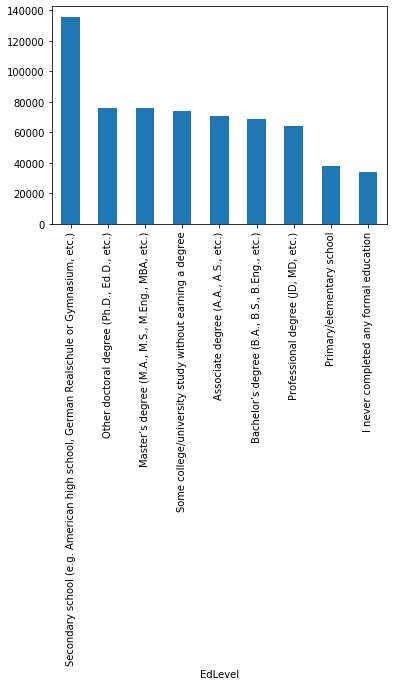

In [40]:
salarios.plot.bar();

    2) Ao criar um gráfico de colunas com a média de salário (ConvertedComp) por nível de satisfação (JobSat), filtrando os dados do Chile, como fica o gráfico? 

In [23]:
df_chile = df.query('Country == "Chile"')
df_chile.head()

,Age,Age1stCode,ConvertedComp,Country,EdLevel,JobSat,OpSys,YearsCode
289,18.0,13,NaN,Chile,Primary/elementary school,NaN,Windows,5
1206,26.0,6,18060.0,Chile,Some college/university study without earning ...,Slightly satisfied,Windows,8
1717,33.0,10,30108.0,Chile,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Very dissatisfied,MacOS,16
1742,42.0,12,100602.0,Chile,Some college/university study without earning ...,Very satisfied,MacOS,30
1842,35.0,15,105372.0,Chile,Some college/university study without earning ...,Very satisfied,Linux-based,20


In [24]:
salarios_chile = df_chile.groupby('JobSat').mean()['ConvertedComp']
salarios_chile = salarios_chile.sort_values(ascending=False)
salarios_chile

JobSat
Very satisfied                        33736.666667
Slightly satisfied                    29066.000000
Slightly dissatisfied                 23974.000000
Very dissatisfied                     23881.500000
Neither satisfied nor dissatisfied    23694.117647
Name: ConvertedComp, dtype: float64

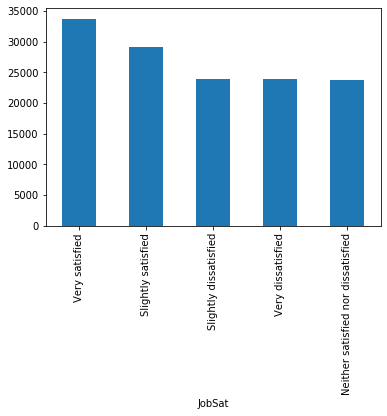

In [25]:
salarios_chile.plot.bar();

    3) Crie um gráfico para analisar o uso dos Sistemas Operacionais (OpSys). 
    Qual a Sistema Operacional mais usado na França?

In [41]:
so_franca = df_franca['OpSys'].value_counts()
so_franca

Linux-based    700
Windows        658
MacOS          336
Name: OpSys, dtype: int64

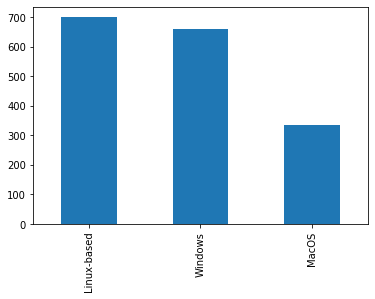

In [42]:
so_franca.plot.bar()

R:  Linux

    5) Crie um gráfico de dispersão com a idade (Age) e a média de salário por idade (ConvertedComp). 
    Filtre por Albânia e adicione uma linha de tendência. 
    Analisando a linha de tendência, podemos afirmar que à medida que a idade aumenta, o salário: 

In [45]:
df_albania = df.query('Country == "Albania"')
df_albania.head()

,Age,Age1stCode,ConvertedComp,Country,EdLevel,JobSat,OpSys,YearsCode
3,25.0,18,NaN,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Slightly dissatisfied,Linux-based,7
562,22.0,18,10812.0,Albania,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Very satisfied,Linux-based,3
9245,22.0,14,NaN,Albania,Some college/university study without earning ...,NaN,MacOS,8
9388,NaN,18,NaN,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Slightly satisfied,Windows,5
10613,38.0,13,25944.0,Albania,Some college/university study without earning ...,Slightly satisfied,MacOS,20


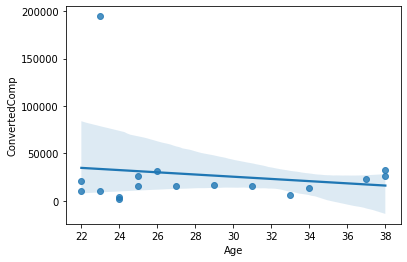

In [48]:
ax = sns.regplot(x="Age", y="ConvertedComp", data=df_albania)

R:  Diminui

    5)Crie um cartão para visualizar a média e outro para visualizar a mediana do salário (ConvertedComp) no Brasil. 
    Qual o valor da média e mediana, respectivamente?

In [49]:
df_brasil = df.query('Country == "Brazil"')
df_brasil.head()

,Age,Age1stCode,ConvertedComp,Country,EdLevel,JobSat,OpSys,YearsCode
43,32.0,21,55893.0,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Neither satisfied nor dissatisfied,Windows,10
58,38.0,15,16488.0,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Slightly satisfied,Windows,24
239,28.0,23,8244.0,Brazil,Some college/university study without earning ...,Slightly satisfied,Windows,5
308,27.0,18,8712.0,Brazil,Some college/university study without earning ...,Slightly satisfied,Windows,10
326,32.0,15,17184.0,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Slightly satisfied,Linux-based,13


In [50]:
df_brasil['ConvertedComp'].mean(), df_brasil['ConvertedComp'].median()

(24941.354364736388, 17184.0)

R:  24.940 e 17.000

    6)Crie um gráfico para analisar o nível de formação dos desenvolvedores (EdLevel). 
    Aplicando um filtro que remove apenas os registros dos Estados Unidos, qual é o país com maior número de desenvolvedores que nunca tiveram uma educação formal? 

In [52]:
df_not_us = df.query('Country != "United States" & EdLevel == "I never completed any formal education"')
df_not_us.head()

,Age,Age1stCode,ConvertedComp,Country,EdLevel,JobSat,OpSys,YearsCode
223,NaN,7,NaN,Finland,I never completed any formal education,Slightly dissatisfied,Windows,15
487,39.0,33,312.0,Kyrgyzstan,I never completed any formal education,Very dissatisfied,Windows,4
653,NaN,28,NaN,Israel,I never completed any formal education,NaN,Windows,20
666,36.0,25,23267.0,United Kingdom,I never completed any formal education,Very satisfied,Windows,11
910,20.0,15,NaN,Israel,I never completed any formal education,NaN,Windows,5


In [53]:
df_not_us['Country'].value_counts()

India                                   56
Israel                                  22
Indonesia                               17
United Kingdom                          17
Bangladesh                              14
                                        ..
Denmark                                  1
Sierra Leone                             1
Venezuela, Bolivarian Republic of...     1
Kenya                                    1
Uruguay                                  1
Name: Country, Length: 97, dtype: int64

R: Índia

    7) Crie um gráfico de forma que consiga visualizar quando os desenvolvedores começaram a trabalhar na área (Age1stCode). Com que idade a maioria das pessoas começa a programar no Brasil? 

In [59]:
df_brasil['Age1stCode'].value_counts()

17                      202
15                      198
18                      174
14                      169
16                      164
12                      112
13                       96
19                       93
20                       70
10                       62
11                       49
21                       32
22                       30
9                        26
8                        22
25                       21
23                       17
24                       13
7                         9
26                        9
28                        9
Younger than 5 years      9
29                        7
5                         7
27                        7
32                        5
35                        4
6                         4
30                        4
40                        2
31                        2
38                        1
34                        1
45                        1
Name: Age1stCode, dtype: int64

R: 17

## SQL

    8) Considere o banco de dados do enunciado. Crie uma consulta em SQL e responda: Qual a média salarial nessa empresa? 

`SELECT AVG(salario) FROM empregado;`

R: 35125

    9) Considere o banco de dados do enunciado. 
    Crie uma consulta em SQL e responda: 
    Quantos empregados do departamento 5 trabalham mais de 10h por semana no projeto chamado "ProductX"? 
    
`
SELECT COUNT(*)
FROM empregado e
INNER JOIN trabalha_em tr
ON e.ssn = tr.essn
INNER JOIN projeto pr
ON tr.pno = pr.pnumero
WHERE pr.pjnome LIKE 'ProductX' 
AND pr.dnum = 5
AND tr.horas > 10;
`

R: 2


    10) Considere o banco de dados do enunciado. 
    Crie uma consulta em SQL e responda: 
    Quantos empregados possuem um dependente com o mesmo primeiro nome que o deles? 

`
SELECT COUNT(*)
FROM empregado e
INNER JOIN dependente d
ON e.ssn = d.essn
WHERE e.pnome = d.nome_dependente;
`

R: 0

    11) Considere o banco de dados do enunciado. 
    Crie uma consulta em SQL e responda: 
    Quais os nomes de todos os empregados que são diretamente supervisionados por Franklin Wong 

`
SELECT e.pnome
FROM empregado e
INNER JOIN empregado sup
ON e.superssn = sup.ssn
WHERE sup.pnome LIKE 'Franklin' 
AND sup.unome LIKE 'Wong';   
`

R: Joyce e Ramesh

    12) Considere o banco de dados do enunciado. 
    Crie uma consulta em SQL e responda: 
    Quem é a pessoa que possui mais tempo de alocação no projeto 'Newbenefits'?
    

`
SELECT e.pnome
FROM empregado e
INNER JOIN trabalha_em tr
ON e.ssn = tr.essn
INNER JOIN projeto pr
ON tr.pno = pr.pnumero
WHERE pr.pjnome LIKE 'Newbenefits'
ORDER BY tr.horas DESC
LIMIT 1;
`

R:  Alicia.

    13) Considere o banco de dados do enunciado. 
    Crie uma consulta em SQL e responda: 
    Qual é a soma dos salários de todos os empregados do departamento chamado 'Research'? 
   
`
SELECT SUM(e.salario)
FROM empregado e
INNER JOIN departamento dp
ON e.dno = dp.dnumero
WHERE dp.dnome LIKE 'Research';
`

R: 133000

    14) Considere o banco de dados do enunciado. 
    Crie uma consulta em SQL e responda: 
    Qual seria o custo do projeto com folha salarial (soma de todos os salários) caso a empresa desse 10% de aumento para todos os empregados que trabalham no projeto 'ProductX'? 

`
SELECT SUM(e.salario)*1.1
FROM empregado e
INNER JOIN trabalha_em tr
ON e.ssn = tr.essn
INNER JOIN projeto pr
ON tr.pno = pr.pnumero
WHERE pr.pjnome LIKE 'ProductX';
`
    
R: 60500

    15) Considere o banco de dados do enunciado. 
    Crie uma consulta em SQL e responda: 
    Qual o nome do departamento com a menor média de salário entre seus funcionários? 
    
`
SELECT dp.dnome, AVG(salario) 
FROM empregado e 
INNER JOIN departamento dp
ON dp.dnumero = e.dno
GROUP BY dp.dnome
ORDER BY AVG(salario)
LIMIT 1;
`

R: Administration.